# Machine Learning - Parte II - Regressão Logística

## Regressão Logística

Regressão logística é um algoritmo de classificação largamente utilizado em diversas aplicações. Trata-se de um algoritmo simples cujo fitting objetiva minizar um erro de predição. Seu entendimento é importante para mais para frente entendermos outros classificadores mais poderosos, por exemplo aqueles baseados em redes neurais.

In [1]:
import sklearn
sklearn.__version__

'0.23.1'

In [2]:
# import de modulos pandas e numpy
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# import de modulos para graficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# imports para Machine Learning 
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split # modulo antigo
from sklearn.model_selection import train_test_split

# para avaliacao
from sklearn import metrics

# dataset
import statsmodels.api as sm

### Função logística

A função logistica [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function) recebe como argumento uma valor de $-\infty$ a $+\infty$, e retorna um valor no intervalo $(0,1)$

$$ \sigma (t)= \frac{1}{1+e^{-t}}$$

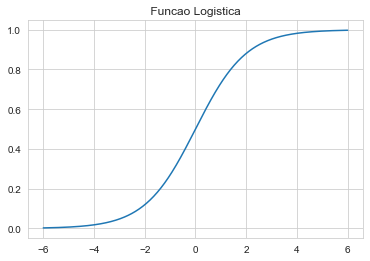

In [3]:
# Função Logistica
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# cria um grade de -6 a 6 ( 500 elementos, igualmente espaçados)
grade_t = np.linspace(-6,6,500)

# calcula os valores de y
p = np.array([logistic(t) for t in grade_t])

# usando exp do numpy que aceita um vetor como argumento
p = 1/(1 + np.exp(-1.0 * grade_t))

# plot
plt.plot(grade_t,p)
plt.title(' Funcao Logistica ');

Consideremos que uma observação seja composta por:
* $\mathbf x = (x_{1}, x_{2} ... , x_{m})$, as $m$ features disponiveis
* $y$, a varíavel que queremos prever 

Na classificação binária, assumimos que $y = 0$ ou $y = 1$. 

A ideia é considerar a função logistica gerando uma probabilidade, a partir de um polinomio:


$$ t(\mathbf x) = w_0 + w_1.x_{1} + w_2.x_{2} ... + w_m.x_{m}$$

onde $w_0, w_1, ..., w_m$ são coeficientes a serem aprendidos, de forma que a equação abaixo:<br>


$$ \hat{y} = Prob[y = 1 \mid \mathbf x]  = $$

$$ \sigma (t(\mathbf x)) = \frac{1}{1+e^{-(w_0 + w_1.x_{1} + w_2.x_{2} ... + w_m.x_{m})}}$$


forneça a 'melhor' estimativa da probabilidade de sucesso, ou seja a probabilidade de que $y$ seja $1$. 

Para tanto o algoritmo procura encontrar os melhores $w_0, w_1, ..., w_m$ que minimizam o erro. 

Uma vez aprendidos os coeficientes, na predição, cada $\mathbf x^{(i)}$ fornecerá seu $\hat{y}^{(i)}$ correspondente, 
onde $i$ denota o indice da amostra.<br>
Se adotarmos um limiar de $0.5$ como a probabilidade que separa as predições entre classes 0 e 1, teremos:
* Se $\hat{y}^{(i)} \leq 0.5$, predição será a classe 0
* Se $\hat{y}^{(i)} > 0.5$, predição será a classe 1

### Exemplo prático

In [4]:
import webbrowser

url = 'http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html'

webbrowser.open_new(url)

True

Quantidade de observações: 6366
Quantidade de features: 9
Definições:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs


In [5]:
# Carregando dataframe 

df = sm.datasets.fair.load_pandas().data

In [6]:
df['teve_affair'] = (df.affairs > 0).astype(int)
df.drop('affairs', axis = 1, inplace = True)

In [7]:
df.shape

(6366, 9)

In [8]:
df.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,teve_affair
958,3.0,37.0,23.0,4.0,1.0,17.0,4.0,4.0,1
4994,4.0,22.0,2.5,0.0,1.0,14.0,4.0,2.0,0
6353,5.0,22.0,2.5,2.0,2.0,14.0,3.0,5.0,0
2255,5.0,27.0,2.5,0.0,4.0,14.0,3.0,5.0,0
5205,4.0,37.0,16.5,2.0,3.0,14.0,3.0,5.0,0


### EDA (Exploratory Data Analysis) 

In [9]:
df.groupby('teve_affair').children.mean()

teve_affair
0    1.238813
1    1.728933
Name: children, dtype: float64

In [10]:
import seaborn as sns

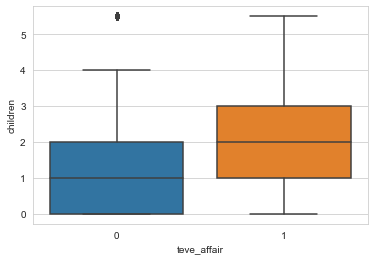

In [11]:
sns.boxplot(data = df, x = 'teve_affair', y = 'children');

### data prep

* transformar em dummies
* definitir feature (X), e valor resposta (y)  
* separar entre treino e teste

In [12]:
df = pd.get_dummies(df, columns = ['occupation', 'occupation_husb'])

In [13]:
X = df.drop('teve_affair', axis = 1)
y = df.teve_affair

In [14]:
X.shape

(6366, 18)

In [15]:
y.shape

(6366,)

In [16]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
X_train

,rate_marriage,age,yrs_married,children,religious,educ,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
4223,4.0,27.0,9.0,2.0,3.0,14.0,0,0,1,0,0,0,0,0,0,0,1,0
1571,3.0,32.0,16.5,2.0,2.0,14.0,0,0,1,0,0,0,0,1,0,0,0,0
2183,5.0,37.0,16.5,2.0,3.0,14.0,0,0,1,0,0,0,0,0,0,1,0,0
5407,4.0,42.0,23.0,4.0,2.0,14.0,0,0,0,0,0,1,0,1,0,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347,4.0,32.0,0.5,0.0,3.0,14.0,0,0,0,0,1,0,0,0,0,0,1,0
2244,4.0,22.0,2.5,0.0,1.0,16.0,0,0,1,0,0,0,0,0,0,1,0,0
3728,3.0,32.0,16.5,3.0,3.0,12.0,0,0,1,0,0,0,0,0,1,0,0,0
1826,3.0,22.0,2.5,0.0,2.0,12.0,0,0,1,0,0,0,0,0,1,0,0,0


### machine learning
* treinar o modelo (X_train) e predizer (X_test)
* apurar as metricas em cima do y_pred

In [47]:
from sklearn.linear_model import LogisticRegression

In [68]:
l_reg = LogisticRegression()

In [69]:
l_reg.fit(X_train, y_train)

/Users/hitoshinagano/.virtualenvs/tensorflow2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [50]:
y_pred = l_reg.predict(X_test)

In [55]:
X_test.shape

(1592, 18)

In [57]:
y_pred.shape

(1592,)

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
y_test.values

array([1, 1, 1, ..., 0, 0, 0])

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7160804020100503
0.625
0.3269230769230769
0.4292929292929293


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, y_pred)

array([[976, 105],
       [341, 170]])

In [33]:
170/(170 + 341)

0.33268101761252444

In [34]:
170/(170 + 105)

0.6181818181818182

### normalização de variáveis

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
mm = MinMaxScaler()

In [95]:
X = mm.fit_transform(X)

In [99]:
X[:, 0]

array([0.5 , 0.5 , 0.75, ..., 1.  , 1.  , 0.75])

## validação cruzada

In [58]:
from sklearn.model_selection import KFold, cross_val_score

In [100]:
kf = KFold(n_splits = 3, shuffle = True)

In [101]:
l_reg = LogisticRegression()

In [102]:
acc = cross_val_score(l_reg, X, y, cv = kf, scoring = 'accuracy')
precision = cross_val_score(l_reg, X, y, cv = kf, scoring = 'precision')
recall = cross_val_score(l_reg, X, y, cv = kf, scoring = 'recall')

In [109]:
precision

array([0.65060241, 0.62533693, 0.61246612])

In [107]:
print(acc.mean())
print(precision.mean())
print(recall.mean())

0.7241595978636507
0.6294684871745068
0.3519369065582218


In [110]:
from sklearn.model_selection import TimeSeriesSplit

In [111]:
ts = TimeSeriesSplit()